In [1]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector 
import numpy as np

db=mysql.connector.connect(
    host='localhost',
    user='root',
    password='S@gar7870',
    database='ecommerce'
)
cur = db.cursor()


In [ ]:
import os
import pandas as pd
import mysql.connector

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items'),
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='S@gar7870',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/sagar/Desktop/data analytics all project/python+sql/archive'

def get_sql_type(dtype):
    """Map pandas dtypes to MySQL data types."""
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

# Batch size for processing large datasets
batch_size = 1000

for csv_file, table_name in csv_files:
    try:
        file_path = os.path.join(folder_path, csv_file)
        
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path)
        
        # Replace NaN with None to handle SQL NULL
        df = df.where(pd.notnull(df), None)
        
        # Clean column names
        df.columns = [col.strip().replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

        # Debugging: Print first few rows and column names
        print(f"Processing {csv_file}")
        print(f"Columns: {df.columns.tolist()}")
        print(f"Sample data:\n{df.head()}\n")
        
        # Generate the CREATE TABLE statement with appropriate data types
        columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
        create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
        cursor.execute(create_table_query)

        # Prepare data for batch insertion
        values = [
            tuple(None if pd.isna(x) else x for x in row)
            for row in df.to_numpy()
        ]
        placeholders = ', '.join(['%s'] * len(df.columns))
        insert_query = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({placeholders})"

        # Insert in batches
        for i in range(0, len(values), batch_size):
            batch = values[i:i + batch_size]
            cursor.executemany(insert_query, batch)
            conn.commit()

        print(f"Data imported successfully for table: {table_name}\n")

    except Exception as e:
        print(f"Error processing file {csv_file}: {e}")
        conn.rollback()

# Close the connection
conn.close()


In [2]:
##  Basic Queries

#Q.1) List all unique cities where customers are located.

# Define the query to fetch unique cities
query = """SELECT DISTINCT customer_city FROM customers"""

cur.execute(query)      # Execute the query
data = cur.fetchall()   # Fetch the results
data                       #print the data


[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

In [3]:
#Q.2) Count the number of orders placed in 2017.

query = """
    SELECT COUNT(order_id) 
    FROM orders
    WHERE YEAR(order_purchase_timestamp) = 2017;
"""

cur.execute(query)     
data = cur.fetchall()   
data                       



[(360808,)]

In [ ]:
#Q.3) Find the total sales per category.
query=""" SELECT products.product_category  category , sum(payments.payment_value)  sales
        FROM products JOIN order_items on products.product_id=order_items.product_id
        JOIN payments on payments.order_id=order_items.order_id 
        GROUP BY   category """ 
cur.execute(query)     
data = cur.fetchall()   
data   

In [4]:
#Q.4) Calculate the percentage of orders that were paid in installments.
query=""" SELECT 
    (COUNT(CASE WHEN payment_installments > 0 THEN 1 END) * 100.0 / COUNT(*)) 
    AS percentage_paid_in_installments FROM payments  """ 
cur.execute(query)     
data = cur.fetchall()   
data   


[(Decimal('99.99807'),)]

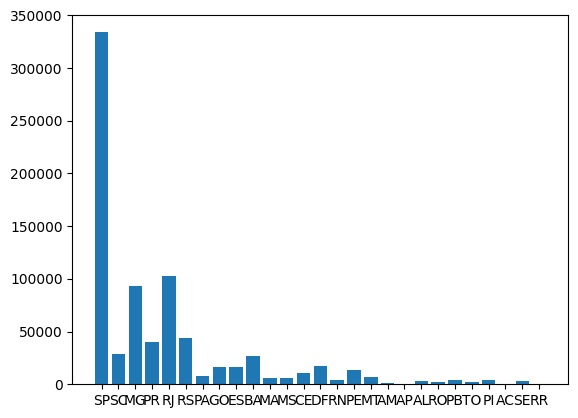

In [6]:
# Q.5) Count the number of customers from each state. 
query=""" SELECT customer_state ,COUNT( customer_id) from customers 
        GROUP BY customer_state   """ 
cur.execute(query)     
data = cur.fetchall()   

df=pd.DataFrame(data,columns=["state","customer_count"])
# df

#plot bar 
plt.bar(df["state"],df["customer_count"])
plt.show()

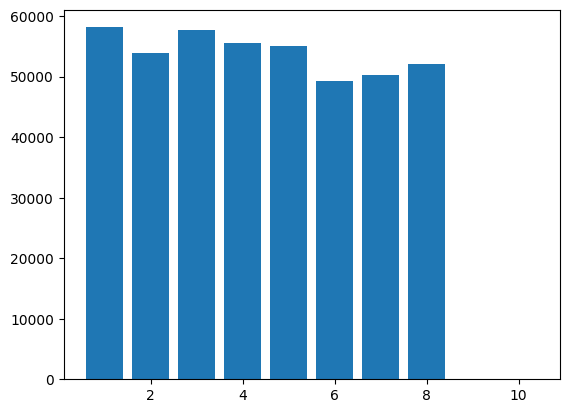

In [7]:
## Intermediate Queries

# 1. Calculate the number of orders per month in 2018.

query = """
    SELECT MONTH(order_purchase_timestamp) AS Month_Name, 
    COUNT(order_id) AS No_of_orders   FROM  orders
    WHERE    YEAR(order_purchase_timestamp) = 2018
    GROUP BY Month_Name  ORDER BY Month_Name ASC ;
"""

# Execute the query
cur.execute(query)
data = cur.fetchall()

df=pd.DataFrame(data,columns=["months","No_of_orders"])
# df

#plot bar 
plt.bar(df["months"],df["No_of_orders"])
plt.show()


In [15]:
# 2. Find the average number of products per order, grouped by customer city.
query = """with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc"""



cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns = ["customer city", "average products/order"])
df.head(10)

,customer city,average products/order
0,padre carvalho,280.00
1,celso ramos,260.00
2,datas,240.00
3,candido godoi,240.00
4,matias olimpio,200.00
5,cidelandia,160.00
6,curralinho,160.00
7,picarra,160.00
8,morro de sao paulo,160.00
9,teixeira soares,160.00


In [3]:
# 3. Calculate the percentage of total revenue contributed by each product category.

query = """select upper(products.product_category) category, 
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc"""


cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "percentage distribution"])
df.head(10)

,Category,percentage distribution
0,BED TABLE BATH,427.90
1,HEALTH BEAUTY,414.11
2,COMPUTER ACCESSORIES,396.11
3,FURNITURE DECORATION,357.35
4,WATCHES PRESENT,357.11
5,SPORT LEISURE,347.84
6,HOUSEWARES,273.54
7,AUTOMOTIVE,212.96
8,GARDEN TOOLS,209.45
9,COOL STUFF,194.82


In [2]:
#pre-requisite foe Q.4
#Q ->find haar product kitne baar order hua h
query=""" SELECT products.product_category,COUNT(order_items.product_id) 
          from products JOIN order_items ON 
          products.product_id=order_items.product_id GROUP BY 
          products.product_category
    """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["category", "order_count"])
df

,category,order_count
0,HEALTH BEAUTY,386800
1,sport leisure,345640
2,Cool Stuff,151840
3,computer accessories,313080
4,Watches present,239640
...,...,...
69,CITTE AND UPHACK FURNITURE,1520
70,Hygiene diapers,1560
71,flowers,1320
72,insurance and services,80


In [3]:
#Time ->  1:04:36 (https://www.youtube.com/watch?v=hK-qUy3UfT8&t=368s)

# 4. Identify the correlation between product price and the number of times a product has been purchased.
# question ka matlab ye hai ki,hume pata karna h ki jab humara product ka price increase ya decrease ho rha
#  to kya order bhi increase ya decrease ho rha
#(generally yesa hota h ki product ka price increase hone pe,wo product kum log order karte h)

#first we find , kitna baar ek particular product buy hua h  (in order_items table , group by order_item_id , product id and price)
#haar product ke basis pe uska price find kar lenge

query = """ SELECT products.product_category ,COUNT(order_items.product_id), 
            AVG(order_items.price)  from products
            JOIN order_items on products.product_id=order_items.product_id 
             GROUP BY products.product_category """


cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["category", "order_count","price"])
df #this gives-> category,order_count,price

arr1=df["order_count"]
arr2=df["price"]
a=np.corrcoef([arr1,arr2])   # array([[ 1.        , -0.10631552], ->their is neutral relationship b/w order_count and price
                           #        [-0.10631552,  1.        ]])  ->it means,0.10..  their is no impact on number of orders on the price 

print("The correlation between price and no. of times the product has been purchased=",a[0][1])

                           
                           
                           # (price increase ho rha h to humara orders pe koi impact nhi padd rha h)
                       # yesa nhi ho rha h ki price increase ho rha h to order decrease ho rha h 

  #diagonal value ko ignore kro(1. and 1. ignore)  
  
#corelstion lies between -1 to +1 (-1 means inversely proportional and +1 means directly proportional)
# -1 -> agar price increase hoga to ,number of order decrease hoga ->this is inversely proportional
# +1 -> agar cigarrate jyada log piyenge to deaths bhi jyada hoga ->this is directly proportional

#In our question,
# 0.105 (very close to 0) -> no correlation between price and number of orders ->this is neutral relationship
#agar yesa value hota to, -0.7 or 0.6 ->this is inversly proportional

The correlation between price and no. of times the product has been purchased= -0.10631552237549531


In [14]:
#Q.5 Calculate the total revenue generated by each seller, and rank them by revenue.

query="""SELECT * ,DENSE_RANK() over(order by revenue DESC) AS rn FROM
        ( SELECT order_items.seller_id, ROUND( SUM(payments.payment_value),2 ) AS REVENUE
         FROM order_items 
         JOIN payments 
         ON order_items.order_id = payments.order_id 
         GROUP BY order_items.seller_id ORDER BY REVENUE DESC ) AS my_table
        """
cur.execute(query)
data = cur.fetchall()
data

[('7c67e1448b00f6e969d365cea6b010ab', 12679172.68, 1),
 ('1025f0e2d44d7041d6cf58b6550e0bfa', 7705551.0, 2),
 ('4a3ca9315b744ce9f8e9374361493884', 7531131.74, 3),
 ('1f50f920176fa81dab994f9023523100', 7256335.5, 4),
 ('53243585a1d6dc2643021fd1853d8905', 7122577.01, 5),
 ('da8622b14eb17ae2831f4ac5b9dab84a', 6805482.98, 6),
 ('4869f7a5dfa277a7dca6462dcf3b52b2', 6604153.02, 7),
 ('955fee9216a65b617aa5c0531780ce60', 5908057.51, 8),
 ('fa1c13f2614d7b5c4749cbc52fecda94', 5162830.75, 9),
 ('7e93a43ef30c4f03f38b393420bc753a', 4628355.24, 10),
 ('6560211a19b47992c3666cc44a7e94c0', 4491443.73, 11),
 ('7a67c85e85bb2ce8582c35f2203ad736', 4225770.0, 12),
 ('25c5c91f63607446a97b143d2d535d31', 4013368.49, 13),
 ('a1043bafd471dff536d0c462352beb48', 3858922.75, 14),
 ('46dc3b2cc0980fb8ec44634e21d2718e', 3721608.5, 15),
 ('b37c4c02bda3161a7546a4e6d222d5b2', 3632976.0, 16),
 ('620c87c171fb2a6dd6e8bb4dec959fc6', 3631698.75, 17),
 ('cc419e0650a3c5ba77189a1882b7556a', 3532739.5, 18),
 ('5dceca129747e92ff8ef7

In [ ]:
## ADVANCE Queries
 